In [1]:
import pandas as pd

# Read in each csv file
double check variable types and ranges look good

In [2]:
df_2020 = pd.read_csv("csv_data/merged/Spring2020Merged_goodRuns.csv")
df_2023 = pd.read_csv("csv_data/merged/Spring2023Merged_goodRuns.csv")
df_2025 = pd.read_csv("csv_data/merged/Spring2025Merged_goodRuns.csv")

/var/folders/tp/y19c81b92lsc5dbbpwb5b0wh0000gn/T/ipykernel_46315/1971075393.py:1: DtypeWarning: Columns (31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2020 = pd.read_csv("csv_data/merged/Spring2020Merged_goodRuns.csv")
/var/folders/tp/y19c81b92lsc5dbbpwb5b0wh0000gn/T/ipykernel_46315/1971075393.py:2: DtypeWarning: Columns (32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv("csv_data/merged/Spring2023Merged_goodRuns.csv")
/var/folders/tp/y19c81b92lsc5dbbpwb5b0wh0000gn/T/ipykernel_46315/1971075393.py:3: DtypeWarning: Columns (31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2025 = pd.read_csv("csv_data/merged/Spring2025Merged_goodRuns.csv")


The beam up time is really only important for dealing with the correlations
Only take runs with no nudges to reduce data footprint and increase speed. 

In [3]:
print(df_2020.columns)

Index(['Date-Time', 'RunNumber', 'DAQ:STATUS', 'CBREM:PLANE', 'GONI:ROLL',
       'GONI:ROLL.RBV', 'GONI:X', 'GONI:X.RBV', 'GONI:Y', 'GONI:Y.RBV',
       'GONI:PITCH', 'GONI:PITCH.RBV', 'GONI:YAW', 'GONI:YAW.RBV', 'AC:X',
       'AC:Y', 'EBEAM:CURRENT', 'EBEAM:ENERGY', 'EBEAM:X', 'EBEAM:Y',
       'CBREM:SET_ENERGY', 'CBREM:ENERGY_UNC', 'CBREM:ENERGY', 'RADIATOR:ID',
       'RADIATOR:NAME', 'goodRun', 'TimeStamp', 'NudgeDuringRun',
       'RunHasNudge', 'NudgeOccurred', 'TotalNudgeSize_thisRun',
       'NudgeSequence', 'NudgeSequenceReduced_Correct',
       'NudgeSequenceReduced_Naive', 'TotalNudges_thisRun',
       'RunHasAbnormalNudge', 'RunHasBacklash', 'BacklashNudge', 'NudgeNumber',
       'NudgePitchSize', 'NudgeYawSize', 'PitchMotionSize', 'YawMotionSize',
       'MotionDone', 'NudgeEnSize_10s', 'CBREM:ENERGY_LAG_ADJUSTED'],
      dtype='object')


In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_nudge_by_type(df,runperiod):
    abnormal_nudges = df[df['RunHasAbnormalNudge']]['RunNumber'].unique()
    print("Number of abnormal nudge runs:",len(abnormal_nudges))

    no_nudge_runs = df[~df['RunHasNudge']]['RunNumber'].unique()
    one_nudge_runs = df[(df['RunHasNudge'])&(df['TotalNudges_thisRun']==1)]['RunNumber'].unique()
    multi_nudge_runs = df[(df['RunHasNudge'])&(df['TotalNudges_thisRun']>1)]['RunNumber'].unique()
    backlash_runs = df[df['RunHasBacklash']]['RunNumber'].unique()
    total_runs = df['RunNumber'].unique()

    xticks = [0, 1, 2, 3]
    yvals = [len(no_nudge_runs)/len(total_runs)*100.0, len(one_nudge_runs)/len(total_runs)*100.0, len(multi_nudge_runs)/len(total_runs)*100.0, len(backlash_runs)/len(total_runs)*100.0]


    xtick_labels = ["No Nudge","1 Nudge",">1 Nudge","Backlash"]

    fig, ax = plt.subplots()
    plt.bar(xticks,yvals)
    plt.xlabel('Nudge Types')
    plt.ylabel('Percentage of Runs')
    plt.title('Number of Runs for Each Nudge Class')
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels)
    plt.savefig('plots/runs_per_class_'+runperiod+'.pdf')

Number of abnormal nudge runs: 186


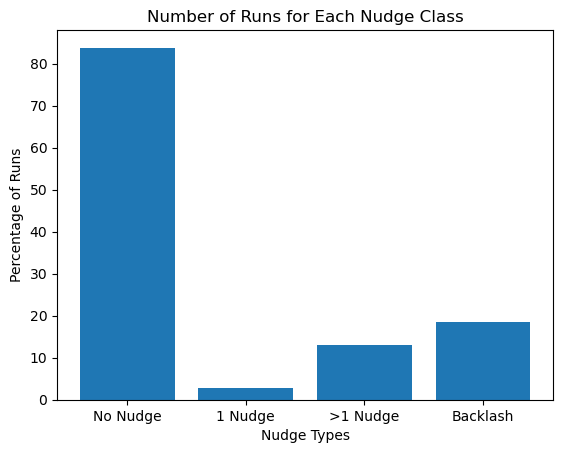

In [5]:
plot_nudge_by_type(df_2020,'2020')

Number of abnormal nudge runs: 124


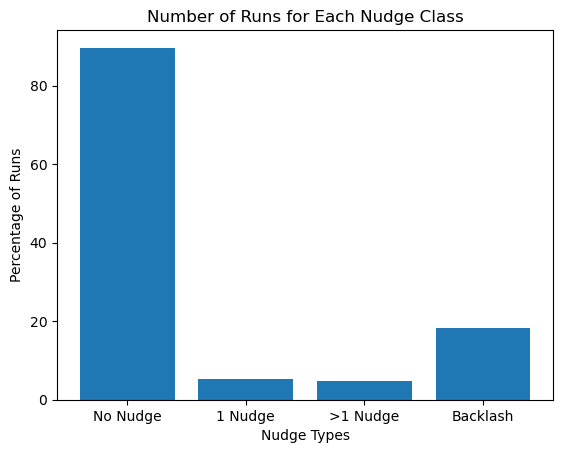

In [6]:
plot_nudge_by_type(df_2023,'2023')

Number of abnormal nudge runs: 106


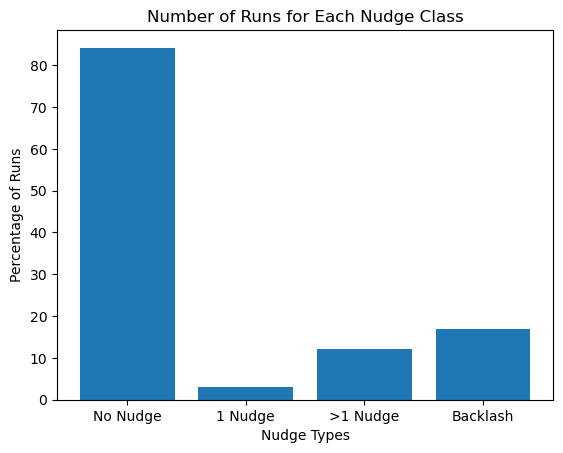

In [7]:
plot_nudge_by_type(df_2025,'2025')

In [8]:
# we are adding beam up time to runs with no nudges, which is best for looking at beam correlations
def simplify_df(df_in):
    df_no_nudge = df_in[(~df_in['RunHasNudge'])&(df_in['goodRun'])]
    # remove nudge related variables, since these runs have no nudges
    df_simple = df_no_nudge[['Date-Time', 'RunNumber', 'DAQ:STATUS', 'CBREM:PLANE',
       'GONI:ROLL', 'GONI:ROLL.RBV', 'GONI:X', 'GONI:X.RBV', 'GONI:Y',
       'GONI:Y.RBV', 'GONI:PITCH', 'GONI:PITCH.RBV', 'GONI:YAW',
       'GONI:YAW.RBV', 'AC:X', 'AC:Y', 'EBEAM:CURRENT', 'EBEAM:ENERGY',
       'EBEAM:X', 'EBEAM:Y', 'CBREM:SET_ENERGY', 'CBREM:ENERGY_UNC',
       'CBREM:ENERGY', 'RADIATOR:ID', 'RADIATOR:NAME', 'TimeStamp','MotionDone','CBREM:ENERGY_LAG_ADJUSTED']]
    return df_simple


In [9]:
df_2020_simple = simplify_df(df_2020)

In [10]:
df_2023_simple = simplify_df(df_2023)

In [11]:
df_2025['CBREM:SET_ENERGY'] = 8.9
df_2025_simple = simplify_df(df_2025)

In [12]:
def add_beam_up(df_in):
    df_out = df_in.copy()
    df_out.reset_index()
    # iterate over all rows in dataframe. Add value for BeamUpTime
    df_out['BeamUpTime'] = 0

    #df_out = pd.DataFrame()

    beam_down_time = -100
    for index, row in df_out.iterrows():

        # get current beam current (nA) and time
        current_beam_current = row['EBEAM:CURRENT']
        current_time = row['TimeStamp']

        # if beam current less than 30 nA, beam is down
        if current_beam_current<30:
            beam_down_time = current_time 

        # if beam_down_time = -100, this will be a very big positive number
        # if beam_down_time is defined, this will be seconds since beam was last down
        df_out.at[index,'BeamUpTime'] = current_time-beam_down_time

        row['BeamUpTime'] = current_time - beam_down_time
        if index%1000==0:
            print(index/len(df_out)*100.0,"%")
    return df_out
    

In [13]:
df_2025_simple_complete = add_beam_up(df_2025_simple)

0.5238597755435481 %
0.582066417270609 %
0.64027305899767 %
0.6984797007247309 %
1.164132834541218 %
1.222339476268279 %
1.28054611799534 %
1.338752759722401 %
1.3969594014494617 %
1.5715793266306444 %
1.6297859683577054 %
1.6879926100847664 %
1.7461992518118272 %
1.8044058935388883 %
1.8626125352659493 %
1.9208191769930099 %
1.9790258187200709 %
2.037232460447132 %
2.0954391021741925 %
2.1536457439012535 %
2.2118523856283145 %
2.2700590273553756 %
2.328265669082436 %
2.386472310809497 %
2.444678952536558 %
2.5028855942636192 %
2.56109223599068 %
2.619298877717741 %
3.084952011534228 %
3.1431586532612887 %
3.20136529498835 %
3.259571936715411 %
3.3177785784424723 %
3.375985220169533 %
3.4341918618965934 %
3.4923985036236544 %
3.550605145350715 %
3.6088117870777765 %
3.667018428804837 %
3.7252250705318986 %
4.132671562621325 %
4.190878204348385 %
4.249084846075446 %
4.307291487802507 %
4.365498129529568 %
4.423704771256629 %
4.48191141298369 %
4.540118054710751 %
4.598324696437812 %
4.6

In [14]:
df_2023_simple_complete = add_beam_up(df_2023_simple)

0.0 %
0.03729082179648534 %
0.07458164359297068 %
0.11187246538945603 %
0.14916328718594135 %
0.1864541089824267 %
0.22374493077891205 %
0.2610357525753974 %
0.2983265743718827 %
0.33561739616836805 %
0.3729082179648534 %
0.41019903976133876 %
0.4474898615578241 %
0.48478068335430946 %
0.5220715051507948 %
0.55936232694728 %
0.5966531487437654 %
0.6339439705402508 %
0.6712347923367361 %
0.7085256141332215 %
0.7458164359297068 %
0.7831072577261922 %
0.8203980795226775 %
0.8576889013191628 %
0.8949797231156482 %
0.9322705449121335 %
0.9695613667086189 %
1.006852188505104 %
1.0441430103015896 %
1.081433832098075 %
1.11872465389456 %
1.1560154756910457 %
1.1933062974875308 %
1.2305971192840164 %
1.2678879410805015 %
1.3051787628769869 %
1.3424695846734722 %
1.3797604064699576 %
1.417051228266443 %
1.4543420500629283 %
1.4916328718594136 %
1.528923693655899 %
1.5662145154523843 %
1.6035053372488697 %
1.640796159045355 %
1.6780869808418402 %
1.7153778026383255 %
1.752668624434811 %
1.7899594

In [15]:
df_2020_simple_complete = add_beam_up(df_2020_simple)

0.0 %
0.04911309124180978 %
0.09822618248361956 %
0.14733927372542935 %
0.1964523649672391 %
0.2455654562090489 %
0.5893570949017174 %
0.6384701861435271 %
0.6875832773853369 %
0.7366963686271466 %
0.7858094598689565 %
0.8349225511107662 %
0.884035642352576 %
1.2769403722870543 %
1.326053463528864 %
2.0627498321560105 %
2.1118629233978203 %
2.16097601463963 %
2.21008910588144 %
2.25920219712325 %
2.3083152883650597 %
2.3574283796068696 %
2.701220018299538 %
2.7503331095413475 %
2.7994462007831573 %
2.848559292024967 %
2.8976723832667766 %
2.9467854745085864 %
2.9958985657503967 %
3.3888032956848746 %
3.4379163869266844 %
3.4870294781684943 %
3.536142569410304 %
3.585255660652114 %
4.223725846795641 %
4.2728389380374505 %
4.5184043942465 %
4.56751748548831 %
4.6166305767301195 %
4.665743667971929 %
4.714856759213739 %
4.763969850455548 %
4.813082941697358 %
4.862196032939168 %
4.911309124180978 %
4.9604222154227875 %
5.009535306664597 %
5.058648397906407 %
5.451553127840885 %
5.50066621

In [16]:
df_2020_simple_complete['BeamUpTime'].describe()

count    2.036117e+06
mean     4.151926e+01
std      1.339705e+03
min     -3.949100e+04
25%      1.500000e+01
50%      9.700000e+01
75%      2.510000e+02
max      1.101500e+04
Name: BeamUpTime, dtype: float64

In [17]:
df_2023_simple_complete['BeamUpTime'].describe()

count    2.681625e+06
mean    -1.720223e+01
std      3.170814e+03
min     -2.241550e+05
25%      0.000000e+00
50%      6.400000e+01
75%      2.090000e+02
max      6.677000e+03
Name: BeamUpTime, dtype: float64

In [18]:
df_2025_simple_complete['BeamUpTime'].describe()

count    1.718017e+06
mean     1.014228e+02
std      1.828270e+03
min     -1.410430e+05
25%      0.000000e+00
50%      1.410000e+02
75%      4.470000e+02
max      7.376000e+03
Name: BeamUpTime, dtype: float64

In [19]:
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def plot_up_time(df_in,runperiod):
    bins = np.arange(1,500,1)
    plt.hist(df_in['BeamUpTime'],bins=bins)
    plt.title('Beam Up Time For Spring '+runperiod)
    plt.xlabel('Beam Up Time (s)')
    plt.savefig('plots/beam_up_'+runperiod+'.pdf')

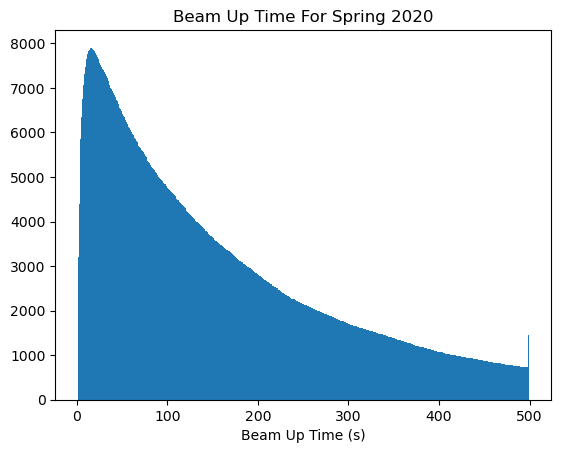

In [20]:
plot_up_time(df_2020_simple_complete,'2020')

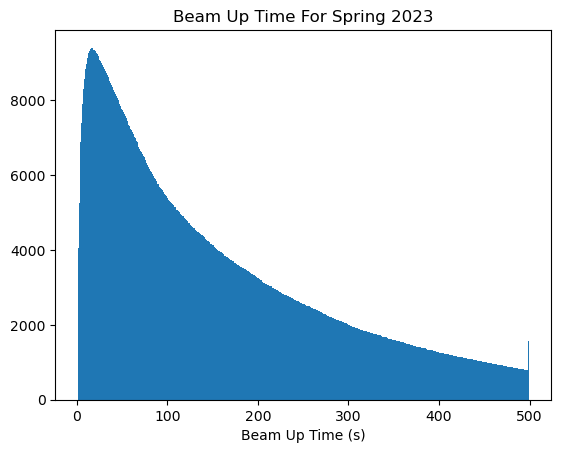

In [21]:
plot_up_time(df_2023_simple_complete,'2023')

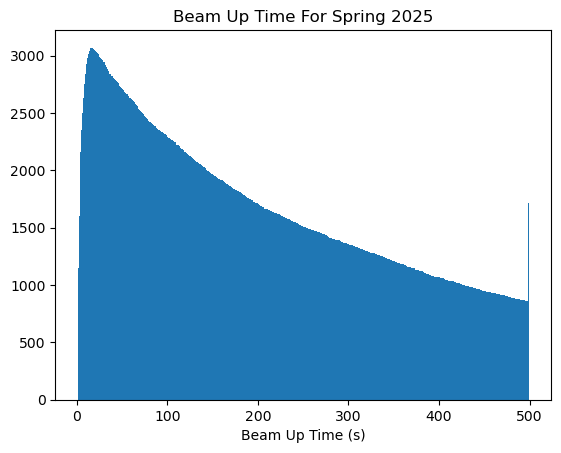

In [22]:
plot_up_time(df_2025_simple_complete,'2025')

In [23]:
# look at diff in CBREM:ENERGY for each second. See how long it takes to see updated energy after beam down

def plot_deltaE_vs_up_time(df_in,runperiod):
    df_in['CBREM:EN_DIFF'] = df_in['CBREM:ENERGY'].diff()
    df_viz = df_in[(abs(df_in['CBREM:EN_DIFF'])>0.05)]
    plt.scatter(df_viz['BeamUpTime'],df_viz['CBREM:EN_DIFF'],alpha=0.1,rasterized=True)
    plt.xlabel('Time Since Beam Down (s)')
    plt.ylabel('Change in Energy (MeV)')
    plt.xlim(0,10)
    plt.ylim(-100,100)
    plt.title('Energy Change vs. Time Since Beam Down')
    plt.savefig('plots/deltaE_vs_beamDownTime_'+runperiod+'.pdf')

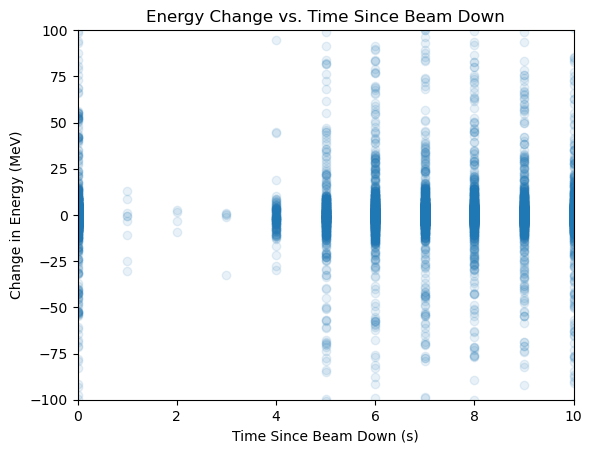

In [24]:
plot_deltaE_vs_up_time(df_2020_simple_complete,'2020')

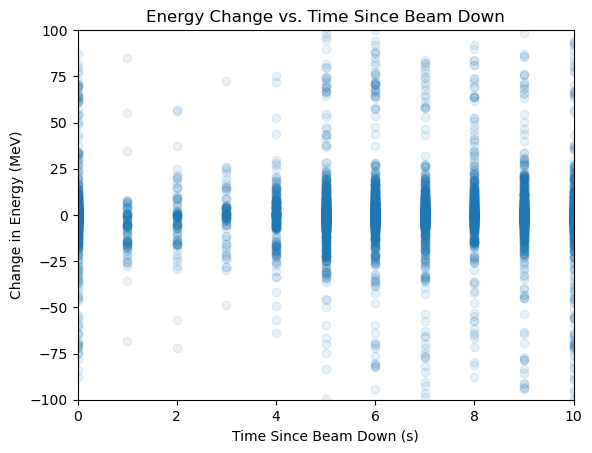

In [25]:
plot_deltaE_vs_up_time(df_2023_simple_complete,'2023')

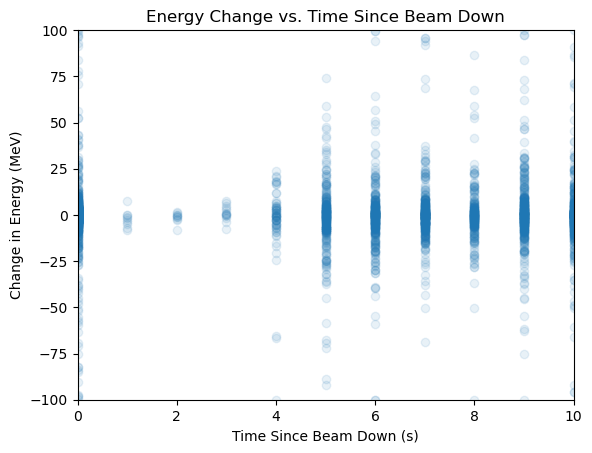

In [26]:
plot_deltaE_vs_up_time(df_2025_simple_complete,'2025')

In [27]:
df_2020_simple_complete.to_csv("csv_data/merged/Spring2020_with_up_time.csv")

In [28]:
df_2023_simple_complete.to_csv("csv_data/merged/Spring2023_with_up_time.csv")

In [29]:
df_2025_simple_complete.to_csv("csv_data/merged/Spring2025_with_up_time.csv")